In [258]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [259]:
movies=pd.read_csv('movies.csv')
credits= pd.read_csv('credits.csv')

In [260]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [261]:
#credit.head(1)['crew'].values
credits.head(1)
#cast: all the actors in the movie
#crew: director, writer, editor, producer etc

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


## MERGE THE TWO DATASETS

In [262]:
#merge the dataframes based on title(any common cloumn)
movies.merge(credits, on='title').shape

(4809, 23)

In [263]:
credits.shape
#movies.shape=> (4803, 20)

(4803, 4)

In [264]:
movies=movies.merge(credits, on='title')

In [265]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


# DATA PROCESSING

#### we are making a content based recommender system, which uses tags, therefore while selecting useful columns think in terms of : can i create a tag from this and if it can be a summary point

In [266]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

# useful columns:

In [267]:
# genre
# id
# keywords
# title
# overview
# cast
# crew
#og lang
#popularity
#release date


In [268]:
movies = movies[['movie_id', 'title','overview','genres','keywords','cast','crew']]

In [269]:
movies.head(1)
# below is the main dataframe(halfpart)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


#### checking for missing data

In [270]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [271]:
movies.dropna(inplace = True)

In [272]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [273]:
# check for duplicate

In [274]:
movies.duplicated().sum()

0

In [275]:
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [276]:
# form recquired: ['Action','Adventure']
# current form: list of dictionary

In [277]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [278]:
def convert(obj):
    L= []
    for i in ast.literal_eval(obj): 
        L.append(i['name'])
    return L

In [279]:
movies['genres'] = movies['genres'].apply(convert)

In [280]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [281]:
movies['keywords']= movies['keywords'].apply(convert)

In [282]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [283]:
# from cast, we only want the first three actors

In [284]:
#{} => dictionary 

In [285]:
def convert3(obj):
    L= []
    counter = 0
    for i in ast.literal_eval(obj): 
        if counter != 3:
            L.append(i['name'])
            counter+=1
        else:
             break
        
    return L

In [286]:
movies['cast'] = movies['cast'].apply(convert3)

In [287]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [288]:
movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [289]:
# we need the name of the dictionary having department as direction

In [290]:
def fetch_director(obj):
    L= []
    for i in ast.literal_eval(obj): 
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [291]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [292]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [293]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [294]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [295]:
movies.shape

(4806, 7)

# Generating artificial colums:

In [296]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import random

In [297]:
# Generate synthetic `userds` so each user belongs to 2–3 clusters (fixed age logic)
# Based on 20 predefined cluster summaries; each user’s 40 interactions split among 2–3 clusters

import pandas as pd
import numpy as np
from datetime import datetime
import random

# 1. Copy existing movies DataFrame
#    (Assume `movies` has already been pared down to remove 
#     'release_date', 'original_language', and 'popularity'.)
movies_full = movies.copy()

# 2. Define 20 cluster templates (each user assigned to multiple clusters)
cluster_definitions = {
    0:  {"genres": ["comedy"],        "weekdays": [4, 5],            "app": ["netflix", "hulu"],            "age_range": (18, 35), "country": []},
    1:  {"genres": ["horror"],        "weekdays": [4, 5, 6],         "month": [10],                        "app": ["hulu"],                         "age_range": (20, 40), "country": ["USA"]},
    2:  {"genres": ["romance"],       "weekdays": [5, 6],            "month": [2],                         "app": ["netflix", "amazon_prime"],    "age_range": (18, 30), "country": []},
    3:  {"genres": ["action"],        "weekdays": list(range(7)),    # “popularity” rule dropped (no more filtering) 
                                  "app": ["amazon_prime", "hulu"],       "age_range": (25, 50), "country": []},
    4:  {"genres": ["family"],        "weekdays": [5, 6],            "app": ["disney_plus"],              "age_range": (5, 15),   "country": ["USA", "Canada"]},
    5:  {"genres": ["drama"],         "weekdays": [0, 1, 2],         # “popularity” rule dropped 
                                  "app": ["netflix"],                    "age_range": (30, 60), "country": []},
    6:  {"genres": ["animation"],     "weekdays": list(range(7)),    "age_range": (5, 20),                  "app": ["disney_plus", "netflix"],    "country": []},
    7:  {"genres": ["documentary"],   "weekdays": [2, 3],            "app": ["hulu"],                      "age_range": (25, 65), "country": ["UK", "Australia"]},
    8:  {"genres": ["sci-fi"],        "weekdays": [4],               "app": ["amazon_prime"],               "age_range": (20, 40), "country": []},
    9:  {"genres": ["drama", "romance"], "weekdays": [2],            "app": ["netflix", "amazon_prime"],   "age_range": (18, 40), "country": ["India"]},
    10: {"genres": ["comedy", "romance"], "weekdays": [5, 6],         "app": ["netflix"],                    "age_range": (18, 30), "country": ["India", "UK"]},
    11: {"genres": ["horror"],        "month": [10],               "app": ["hulu"],                       "age_range": (20, 40), "country": []},
    12: {"genres": ["adventure"],     # “popularity” rule dropped 
                                  "app": ["amazon_prime", "hulu"],      "age_range": (25, 45), "country": []},
    13: {"genres": ["crime"],         "age_range": (25, 40),        "app": ["netflix", "amazon_prime"],   "weekdays": [3, 4],   "country": []},
    14: {"genres": ["fantasy"],       "app": ["amazon_prime"],      "weekdays": [6],                        "age_range": (18, 35), "country": []},
    15: {"genres": ["mystery"],       "weekdays": [0],              "app": ["netflix"],                    "age_range": (30, 50), "country": []},
    16: {"genres": ["musical"],       "month": [2],                 "app": ["netflix", "amazon_prime"],   "age_range": (18, 30), "country": []},
    17: {"genres": ["history"],       "country": ["UK", "Australia"], "app": ["hulu"],                "age_range": (30, 60), "weekdays": [1, 2]},
    18: {"genres": ["biography"],     # “popularity” rule dropped 
                                  "app": ["netflix"],                   "age_range": (25, 60), "country": []},
    19: {"genres": ["animation", "family"], "age_range": (5, 15),    "app": ["disney_plus"],              "weekdays": [5, 6],   "country": []}
}


# 3. Global variables
num_users = 1000
user_ids = [f"user_{i+1:04d}" for i in range(num_users)]
apps = ["netflix", "amazon_prime", "disney_plus", "hulu"]
countries = ["USA", "India", "UK", "Canada", "Australia"]
age_ranges_global = list(range(5, 66))  # 5 to 65

# Helper to sample a movie matching cluster rules
# (No filtering on movie 'country'; any "popularity" rules are simply ignored)
def sample_movie_for_cluster(rules):
    candidates = movies_full.copy()

    # (a) Filter by genre if specified
    if rules.get("genres"):
        def match_genre(gl):
            lower_gl = [g.lower() for g in gl]
            return any(g.lower() in lower_gl for g in rules["genres"])
        candidates = candidates[candidates["genres"].apply(match_genre)]

    # (b) We have removed any "popularity" filtering altogether,
    #     because `movies_full` no longer has a 'popularity' column.

    # If no candidates remain, fall back to the entire movies_full
    if candidates.empty:
        candidates = movies_full

    # Return one random movie from the filtered set
    return candidates.sample(1).iloc[0]


# 4. Generate interactions so each user belongs to 2–3 clusters
records = []
for user in user_ids:
    # (a) Pick 2 or 3 clusters at random
    assigned_clusters = random.sample(list(cluster_definitions.keys()), k=random.choice([2, 3]))

    # (b) Determine user_age by intersecting age_ranges of assigned clusters
    age_min_list = []
    age_max_list = []
    for c in assigned_clusters:
        if "age_range" in cluster_definitions[c]:
            age_min_list.append(cluster_definitions[c]["age_range"][0])
            age_max_list.append(cluster_definitions[c]["age_range"][1])
    if age_min_list and age_max_list:
        overall_min = max(age_min_list)
        overall_max = min(age_max_list)
        if overall_min <= overall_max:
            user_age = random.randint(overall_min, overall_max)
        else:
            user_age = random.choice(age_ranges_global)
    else:
        user_age = random.choice(age_ranges_global)

    # (c) Determine user_country: pick one from any cluster that specifies
    countries_for_user = []
    for c in assigned_clusters:
        if cluster_definitions[c].get("country"):
            countries_for_user.extend(cluster_definitions[c]["country"])
    user_country = random.choice(countries_for_user) if countries_for_user else random.choice(countries)

    # (d) Each user has exactly 40 interactions; split nearly equally among clusters
    base  = 40 // len(assigned_clusters)
    extra = 40 % len(assigned_clusters)
    counts = [base + (1 if i < extra else 0) for i in range(len(assigned_clusters))]

    # (e) For each assigned cluster, sample the specified number of movies
    for idx, c in enumerate(assigned_clusters):
        rules = cluster_definitions[c]

        # Determine which “app” this user uses for this cluster
        raw_app = random.choice(rules.get("app", apps))
        user_app = "amazon_prime" if raw_app == "prime" else raw_app

        # Create the `counts[idx]` interactions for this cluster
        for _ in range(counts[idx]):
            movie = sample_movie_for_cluster(rules)
            mid = movie["movie_id"]

            # Month selection (if specified; otherwise random 1–12)
            if rules.get("month"):
                month = random.choice(rules["month"])
            else:
                month = random.randint(1, 12)

            # Weekday selection (if specified; otherwise random 0–6)
            if rules.get("weekdays"):
                w = random.choice(rules["weekdays"])
                while True:
                    d = random.randint(1, 28)
                    if datetime(2024, month, d).weekday() == w:
                        day = d
                        weekday = w
                        break
            else:
                day     = random.randint(1, 28)
                weekday = datetime(2024, month, day).weekday()

            records.append({
                "user_id":     user,
                "movie_id":    mid,
                "user_rating": random.randint(3, 5),
                "app":         user_app,
                "time_spent":  "watched",
                "month":       month,
                "weekday":     weekday,
                "age":         user_age,
                "country":     user_country
            })

# 5. Build DataFrame and merge metadata
interactions = pd.DataFrame(records)
userds = interactions.merge(movies_full, on="movie_id", how="left")

# 6. Convert list-like columns to tuples to drop duplicates, then back to lists
userds = userds.applymap(lambda x: tuple(x) if isinstance(x, list) else x).drop_duplicates()
for col in ["genres", "keywords", "cast", "crew", "country"]:
    if col in userds.columns:
        userds[col] = userds[col].apply(lambda x: list(x) if isinstance(x, tuple) else x)

# 7. Validate no missing
assert not userds.isnull().any().any(), "Missing values detected in userds"

# 8. Inspect
print("Final userds shape:", userds.shape)
userds.head()


Final userds shape: (40071, 15)


,user_id,movie_id,user_rating,app,time_spent,month,weekday,age,country,title,overview,genres,keywords,cast,crew
0,user_0001,105,4,netflix,watched,6,5,30,UK,Back to the Future,Eighties teenager Marty McFly is accidentally ...,"[Adventure, Comedy, Science Fiction, Family]","[clock tower, car race, terrorist, delorean, l...","[Michael J. Fox, Christopher Lloyd, Lea Thompson]",[Robert Zemeckis]
1,user_0001,165864,5,netflix,watched,10,5,30,UK,Hansel and Gretel Get Baked,An intense new marijuana strain named “Black F...,"[Horror, Comedy]","[witch, marijuana, succubus, power company, ca...","[Molly C. Quinn, Michael Welch, Lara Flynn Boyle]",[Duane Journey]
2,user_0001,28165,4,netflix,watched,6,5,30,UK,The Toxic Avenger Part II,"The Toxic Avenger is lured to Tokyo, Japan by ...","[Comedy, Horror, Action]","[japan, new jersey, sequel, superhero, gore, s...","[Ron Fazio, John Altamura, Phoebe Legere]",[Lloyd Kaufman]
3,user_0001,14113,3,netflix,watched,9,5,30,UK,Zoom,Jack Shepard is an out-of-shape auto shop owne...,"[Family, Fantasy, Comedy]","[superhero, kids and family]","[Tim Allen, Courteney Cox, Chevy Chase]",[Peter Hewitt]
4,user_0001,109513,5,netflix,watched,4,6,30,UK,Hit & Run,Former getaway driver Charlie Bronson jeopardi...,"[Action, Comedy, Romance]","[witness protection, getaway driver, duringcre...","[Kristen Bell, Dax Shepard, Tom Arnold]",[Dax Shepard]


In [298]:
userds.isnull().sum()

user_id        0
movie_id       0
user_rating    0
app            0
time_spent     0
month          0
weekday        0
age            0
country        0
title          0
overview       0
genres         0
keywords       0
cast           0
crew           0
dtype: int64

In [299]:
userds.shape

(40071, 15)

In [300]:
userds.shape

(40071, 15)

# K-Means Clustering 

## Pre-Processing:

In [301]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder

# 1.1. Genre encoder (multi-label)
genre_encoder = MultiLabelBinarizer()
genre_encoder.fit(userds["genres"].tolist())

# 1.2. OneHot encoders for single-label fields
app_encoder      = OneHotEncoder(sparse=False, dtype=int).fit(userds[["app"]])
country_encoder  = OneHotEncoder(sparse=False, dtype=int).fit(userds[["country"]])
# lang_encoder     = OneHotEncoder(sparse=False, dtype=int).fit(userds[["original_language"]])
weekday_encoder  = OneHotEncoder(sparse=False, dtype=int).fit(userds[["weekday"]])
month_encoder    = OneHotEncoder(sparse=False, dtype=int).fit(userds[["month"]])


In [302]:
import pandas as pd

rows = []
for user, df in userds.groupby("user_id"):
    rows.append({
        "user_id":        user,
        "avg_user_rating": df["user_rating"].mean(),
        "std_user_rating": df["user_rating"].std(ddof=0) if len(df) > 1 else 0.0,
        "age":            df["age"].iloc[0],
        "genres_list":    df["genres"].tolist(),
        "app_list":       df["app"].tolist(),
        "weekday_list":   df["weekday"].tolist(),
        "month_list":     df["month"].tolist(),
        "country_list":   [df["country"].iloc[0]],
    })

agg_df = pd.DataFrame(rows)


In [303]:
# 3.1. Flatten each user’s list of lists into a single list
flattened = [ sum(gl, []) for gl in agg_df["genres_list"] ]

# 3.2. Transform to a binary matrix (shape: num_users × num_genres)
genre_matrix = genre_encoder.transform(flattened)

# 3.3. Put into a small DataFrame
genre_cols = [f"genre__{g}" for g in genre_encoder.classes_]
genre_df   = pd.DataFrame(genre_matrix, columns=genre_cols, index=agg_df.index)


In [304]:
import numpy as np

all_apps = app_encoder.categories_[0].tolist()  # e.g. ['amazon_prime','disney_plus','hulu','netflix']
app_count_arr = np.zeros((len(agg_df), len(all_apps)), dtype=int)

for i, apps in enumerate(agg_df["app_list"]):
    for a in apps:
        app_count_arr[i, all_apps.index(a)] += 1

app_cols = [f"app_count__{a}" for a in all_apps]
app_df   = pd.DataFrame(app_count_arr, columns=app_cols, index=agg_df.index)


In [305]:
wd_values = weekday_encoder.categories_[0].tolist()  # [0,1,2,3,4,5,6]
wd_count_arr = np.zeros((len(agg_df), len(wd_values)), dtype=int)

for i, wds in enumerate(agg_df["weekday_list"]):
    for wd in wds:
        wd_count_arr[i, wd_values.index(wd)] += 1

wd_cols = [f"weekday_count__{d}" for d in wd_values]
weekday_df = pd.DataFrame(wd_count_arr, columns=wd_cols, index=agg_df.index)


In [306]:
mo_values = month_encoder.categories_[0].tolist()  # [1,2,…,12]
mo_count_arr = np.zeros((len(agg_df), len(mo_values)), dtype=int)

for i, ms in enumerate(agg_df["month_list"]):
    for m in ms:
        mo_count_arr[i, mo_values.index(m)] += 1

mo_cols = [f"month_count__{m}" for m in mo_values]
month_df = pd.DataFrame(mo_count_arr, columns=mo_cols, index=agg_df.index)


In [307]:
ctry_vals = country_encoder.categories_[0].tolist()  # e.g. ['Australia','Canada','India','UK','USA']
ctry_count_arr = np.zeros((len(agg_df), len(ctry_vals)), dtype=int)

for i, cl in enumerate(agg_df["country_list"]):
    c = cl[0]  # single‐element list
    ctry_count_arr[i, ctry_vals.index(c)] = 1

ctry_cols = [f"country__{c}" for c in ctry_vals]
country_df = pd.DataFrame(ctry_count_arr, columns=ctry_cols, index=agg_df.index)



In [308]:
# (A) Keep only avg_user_rating, std_user_rating, and age
base_numeric = agg_df[["avg_user_rating", "std_user_rating", "age"]]

# (B) Concatenate user_id, base_numeric, and the remaining feature‐DFs:
user_feature_df = pd.concat([
    agg_df[["user_id"]].reset_index(drop=True),
    base_numeric.reset_index(drop=True),
    genre_df.reset_index(drop=True),
    app_df.reset_index(drop=True),
    weekday_df.reset_index(drop=True),
    month_df.reset_index(drop=True),
    # lang_df.reset_index(drop=True),    # <--- removed
    country_df.reset_index(drop=True)
], axis=1)

print("Feature matrix shape (users × features):", user_feature_df.shape)


Feature matrix shape (users × features): (1000, 52)


In [309]:
from sklearn.preprocessing import StandardScaler

# 10.1 Extract user IDs and raw feature array
ids   = user_feature_df["user_id"].values
X_raw = user_feature_df.drop(columns=["user_id"]).astype(float).values

# 10.2 Fit/transform StandardScaler
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# 10.3 (Optional) Put back into a DataFrame with column names
feature_cols = user_feature_df.columns.drop("user_id").tolist()
X_scaled_df  = pd.DataFrame(X_scaled, columns=feature_cols)
X_scaled_df.insert(0, "user_id", ids)

print("Scaled feature DataFrame:")
X_scaled_df.head()


Scaled feature DataFrame:


,user_id,avg_user_rating,std_user_rating,age,genre__Action,genre__Adventure,genre__Animation,genre__Comedy,genre__Crime,genre__Documentary,...,month_count__8,month_count__9,month_count__10,month_count__11,month_count__12,country__Australia,country__Canada,country__India,country__UK,country__USA
0,user_0001,1.006848,0.129951,-0.117899,0.070888,0.114766,0.578890,0.031639,0.259299,-0.711354,...,0.806456,1.273731,-0.230973,-0.363047,0.729048,-0.463753,-0.400116,-0.549621,1.784405,-0.52179
1,user_0002,0.206654,0.917058,-0.117899,0.070888,0.114766,0.578890,0.031639,0.259299,1.405770,...,0.236925,-0.926150,-0.784201,-0.363047,0.729048,-0.463753,-0.400116,-0.549621,1.784405,-0.52179
2,user_0003,0.006605,-0.623710,1.389082,0.070888,0.114766,0.578890,0.031639,0.259299,1.405770,...,1.945517,0.173791,-0.645894,1.240989,0.729048,-0.463753,-0.400116,1.819435,-0.560411,-0.52179
3,user_0004,2.007090,-0.787064,0.236685,0.070888,-8.713385,-1.727444,0.031639,0.259299,1.405770,...,-0.332606,-1.476120,-0.507587,-0.363047,-0.376407,2.156320,-0.400116,-0.549621,-0.560411,-0.52179
4,user_0005,-0.193443,0.314917,0.325331,0.070888,0.114766,-1.727444,0.031639,0.259299,-0.711354,...,-0.332606,0.173791,1.152098,-0.897725,0.176320,2.156320,-0.400116,-0.549621,-0.560411,-0.52179


In [314]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import SpectralClustering

# Assume X_scaled (num_users × num_features) and ids are already defined.

results = {}

# 8.1. Plain K-Means
km = KMeans(n_clusters=20, random_state=42)
labels_km = km.fit_predict(X_scaled)
results["KMeans"] = silhouette_score(X_scaled, labels_km)

# 8.2. GMM (diagonal covariance)
gmm = GaussianMixture(n_components=20, covariance_type="diag", random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
results["GMM (diag)"] = silhouette_score(X_scaled, labels_gmm)

# 8.3. Agglomerative (Ward)
agg = AgglomerativeClustering(n_clusters=20, linkage="ward")
labels_agg = agg.fit_predict(X_scaled)
results["Agglomerative (Ward)"] = silhouette_score(X_scaled, labels_agg)

# 8.4. Birch → Subclusters → K-Means
from sklearn.cluster import Birch
birch = Birch(n_clusters=None, threshold=0.5, branching_factor=50)
birch.fit(X_scaled)
sub_centers = birch.subcluster_centers_
km_sub = KMeans(n_clusters=20, random_state=42).fit(sub_centers)
birch_labels = birch.predict(X_scaled)
labels_birchkm = km_sub.labels_[birch_labels]
results["Birch+KMeans"] = silhouette_score(X_scaled, labels_birchkm)

# 8.5. PCA → KMeans
pca = PCA(n_components=15, random_state=42)
X_pca = pca.fit_transform(X_scaled)
km_pca = KMeans(n_clusters=20, random_state=42)
labels_pca = km_pca.fit_predict(X_pca)
results["PCA(15)+KMeans"] = silhouette_score(X_scaled, labels_pca)

# 8.6. Spectral (cosine)
A = cosine_distances(X_scaled)
spec = SpectralClustering(n_clusters=20, affinity="precomputed", assign_labels="kmeans", random_state=42)
labels_spec = spec.fit_predict(A)
results["Spectral (cosine)"] = silhouette_score(X_scaled, labels_spec)

# 8.7. Summarize results
df_results = pd.DataFrame.from_dict(results, orient="index", columns=["sil_score"])
df_results = df_results.sort_values("sil_score", ascending=False)
print(df_results)


                      sil_score
KMeans                 0.058495
Birch+KMeans           0.056170
GMM (diag)             0.048151
Agglomerative (Ward)   0.044321
PCA(15)+KMeans         0.042178
Spectral (cosine)     -0.143841


In [315]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Example DBSCAN parameters—you’ll likely need to tune eps/min_samples heavily
dbs = DBSCAN(eps=1.5, min_samples=10, metric="euclidean")
labels_dbs = dbs.fit_predict(X_scaled)    # labels in {..., -1} ∪ {0,1,2,...}

# Count how many non‐noise labels we have
unique_labels = set(labels_dbs)
n_clusters_dbs = len(unique_labels) - (1 if -1 in labels_dbs else 0)
n_noise = list(labels_dbs).count(-1)
print(f"DBSCAN found {n_clusters_dbs} clusters + {n_noise} noise points.")

# Compute silhouette only if there are at least 2 non-noise clusters:
if n_clusters_dbs > 1:
    # Exclude noise points (label == -1) when computing silhouette
    mask = labels_dbs != -1
    sil_dbs = silhouette_score(X_scaled[mask], labels_dbs[mask])
    print(f"DBSCAN silhouette (excluding noise) = {sil_dbs:.4f}")
else:
    print("Not enough clusters to compute silhouette.")


DBSCAN found 0 clusters + 1000 noise points.
Not enough clusters to compute silhouette.


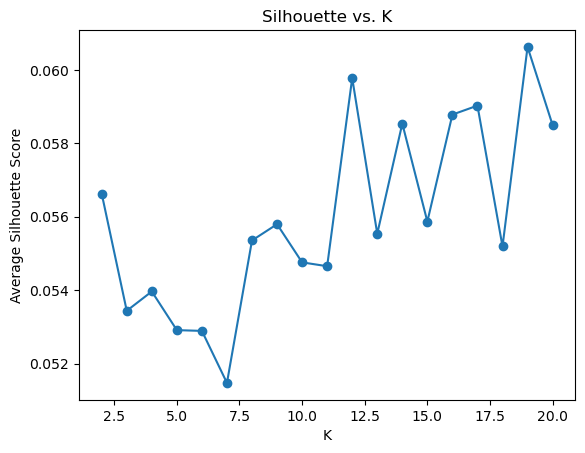

Highest silhouette at K = 19


In [310]:
from sklearn.metrics import silhouette_score

Ks = list(range(2, 21))
sil_avgs = []
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_avgs.append(silhouette_score(X_scaled, labels))

plt.plot(Ks, sil_avgs, "o-")
plt.xlabel("K")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette vs. K")
plt.show()

best_k = Ks[np.argmax(sil_avgs)]
print(f"Highest silhouette at K = {best_k}")



In [311]:
from sklearn.cluster import KMeans
import pandas as pd

# Assume `best_k` was computed previously (e.g. best_k = 19)
n_clusters = best_k

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)   # shape: (num_users,)

# Build a DataFrame mapping each user_id → cluster_label
user_cluster_df = pd.DataFrame({
    "user_id":      ids,
    "cluster_label": cluster_labels
})

print("Users per cluster:")
print(user_cluster_df["cluster_label"].value_counts().sort_index())

Users per cluster:
cluster_label
0      49
1      73
2      54
3     115
4      12
5      61
6      22
7     119
8      35
9      72
10     77
11     62
12      1
13      5
14     24
15     26
16     68
17     52
18     73
Name: count, dtype: int64


In [312]:
import numpy as np

def summarize_cluster(k, feature_cols, kmeans_model, scaler_obj, top_n=5):
    # 1) Get the scaled centroid for cluster k
    cent_scaled = kmeans_model.cluster_centers_[k]
    # 2) Inverse-scale it back to “raw” feature units
    cent_raw = scaler_obj.inverse_transform(cent_scaled.reshape(1, -1)).flatten()
    # 3) Sort features in descending order of their raw value
    idx_desc = np.argsort(-cent_raw)

    print(f"\nCluster #{k} top {top_n} features (raw values):")
    for i in idx_desc[:top_n]:
        print(f"  {feature_cols[i]:<20} → {cent_raw[i]:.2f}")

# Example: summarize the top-5 features for cluster 0
summarize_cluster(
    k=0,
    feature_cols=feature_cols,  # your updated list of columns (no popularity/lang)
    kmeans_model=kmeans,
    scaler_obj=scaler,
    top_n=5
)




Cluster #0 top 5 features (raw values):
  age                  → 31.24
  app_count__hulu      → 26.33
  month_count__10      → 21.20
  app_count__netflix   → 10.16
  weekday_count__2     → 7.31
